# Prevendo o preço de uma pizza de acordo com o seu diâmetro

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Diâmetros (cm)
Diametros = np.array([7, 10, 15, 30, 45])

# Preços (R$)
Precos = np.array([8, 11, 16, 38.5, 52])

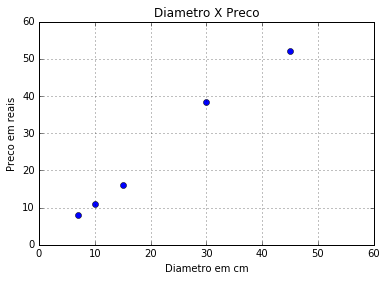

In [3]:
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Diametro X Preco')
plt.plot(Diametros,Precos,'o')
plt.axis([0,60,0,60])
plt.grid()
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
modelo_regressao_linear = LinearRegression()

In [6]:
#Mudando o formato do array onde cada linha representa um exemplo
Diametros = np.reshape(Diametros,(-1,1))

modelo_regressao_linear.fit(Diametros,Precos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
modelo_regressao_linear.predict(60)

array([ 71.58293744])

In [8]:
print(modelo_regressao_linear.coef_)
print(modelo_regressao_linear.intercept_)

[ 1.20422117]
-0.670332477606


In [9]:
from sklearn.metrics import mean_squared_error

print("Mean squared error = ", mean_squared_error(Precos,modelo_regressao_linear.predict(Diametros)))

('Mean squared error = ', 2.7420035671821372)


# A Linha em laranja representa os valores preditos pelo modelo treinado

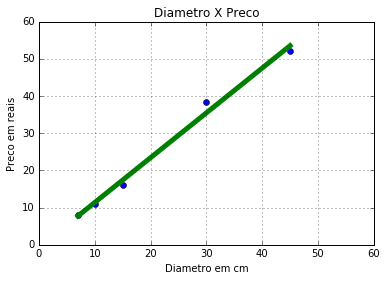

In [10]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Diametro X Preco')
plt.plot(Diametros,Precos,'o')
plt.plot(Diametros,modelo_regressao_linear.predict(Diametros),linewidth=5)
plt.axis([0,60,0,60])
plt.grid()
plt.show()

# Treinando um modelo de regressão polinomial

In [17]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [18]:
degree = 3

modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial.fit(Diametros, Precos)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [19]:
print("Mean squared error = ", mean_squared_error(Precos,modelo_polinomial.predict(Diametros)))

('Mean squared error = ', 0.056535792728931923)


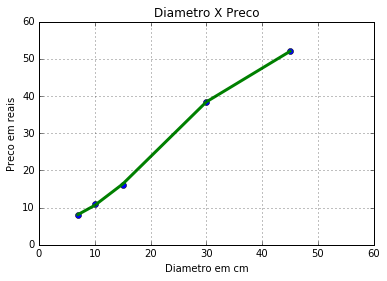

In [21]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Diametro X Preco')
plt.plot(Diametros,Precos,'o')
plt.plot(Diametros,modelo_polinomial.predict(Diametros),linewidth=3)
plt.axis([0,60,0,60])
plt.grid()
plt.show()

In [22]:
print(mean_squared_error(Precos,modelo_regressao_linear.predict(Diametros)))
print(mean_squared_error(Precos,modelo_polinomial.predict(Diametros)))

2.74200356718
0.0565357927289


In [23]:
from sklearn.datasets import load_boston
import pandas as pd

In [24]:
boston = load_boston()

In [25]:
boston.data.shape

(506L, 13L)

In [26]:
boston.target.shape

(506L,)